In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("2015.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Trying to visualise the happiness score of various countries

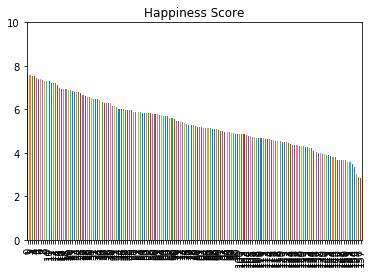

In [4]:
df["Happiness Score"].plot(kind='bar',title="Happiness Score", ylim=(0,10))

The above visualization is not at all helpful because of the presence of so many unique data points

Again I will try to visualize based on the one of the coutry regions

In [5]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try visualizing Western European countries

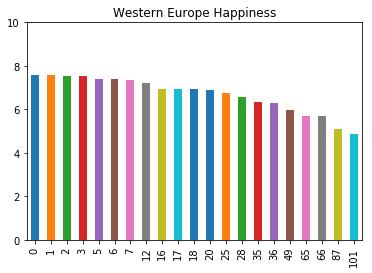

In [6]:
df.loc[df["Region"]=='Western Europe',"Happiness Score"].plot(kind='bar',title="Western Europe Happiness",ylim=(0,10))

This was not helpful either because of so many different countries in western europe

In [7]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Now I will try to visualize Southern Asia with 7 countries

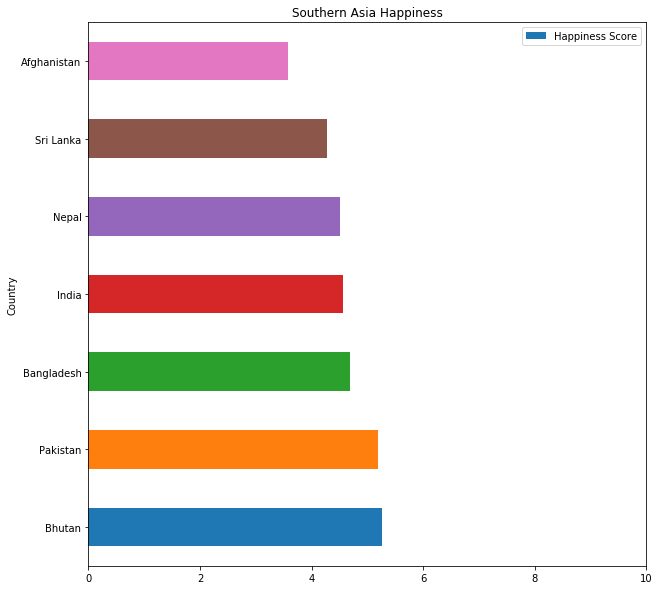

In [8]:
df[df["Region"]=='Southern Asia'].plot(x='Country',y='Happiness Score',kind='barh',title="Southern Asia Happiness",xlim=(0,10),figsize=(10,10))

In [9]:
aus_nz = df.groupby('Region').get_group('Australia and New Zealand')
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [10]:
grouped = df.groupby('Region')

happy_grouped = grouped["Happiness Score"]

happy_mean = happy_grouped.mean()

In [11]:
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

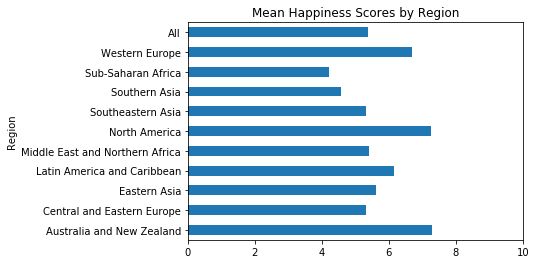

In [12]:
pv_happiness = df.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

pv_happiness.plot(kind='barh',xlim=(0,10),title="Mean Happiness Scores by Region", legend=False)

In [16]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

df = df.rename(mapping,axis=1)

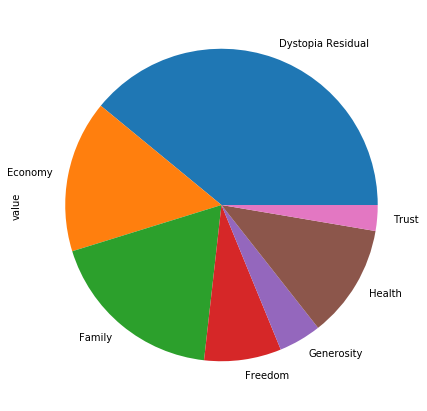

In [18]:
melt = pd.melt(df, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])

melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index='variable',values='value')

pv_melt.plot(kind='pie',y='value',legend=False,figsize=(7,8))
plt.show()